In [2]:
%matplotlib inline
import os
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
#We begin by sorting values by chronological order

data = pd.read_csv("train.csv.bz2")
data["DateOfDeparture"] = pd.to_datetime(data["DateOfDeparture"])
data = data.sort_values("DateOfDeparture")
data = data.set_index(data["DateOfDeparture"])
data.columns = ["Date", "Departure", "Arrival", "WeeksToDeparture", "log_PAX", "std_wtd"]
data.head(20)

,Date,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd
DateOfDeparture,,,,,,
2011-09-01,2011-09-01,SFO,SEA,12.200000,11.641595,7.648529
2011-09-01,2011-09-01,DFW,ATL,12.250000,12.686301,8.103944
2011-09-01,2011-09-01,MSP,DEN,11.260870,11.033573,8.427322
2011-09-01,2011-09-01,MIA,ATL,11.181818,11.063493,7.417074
2011-09-01,2011-09-01,LGA,DFW,9.736842,11.187871,6.942959
2011-09-01,2011-09-01,DEN,LAX,12.607143,11.634324,8.288052
2011-09-01,2011-09-01,LGA,BOS,6.583333,12.579702,7.216878
2011-09-01,2011-09-01,LAX,BOS,12.615385,11.155192,7.848959
2011-09-01,2011-09-01,SFO,DEN,10.636364,11.619697,6.750982


In [4]:
#We know check is there are any missing values 

print(data.isna().sum())
print("\n")
print("No missing data for this Dataset")

Date                0
Departure           0
Arrival             0
WeeksToDeparture    0
log_PAX             0
std_wtd             0
dtype: int64


No missing data for this Dataset


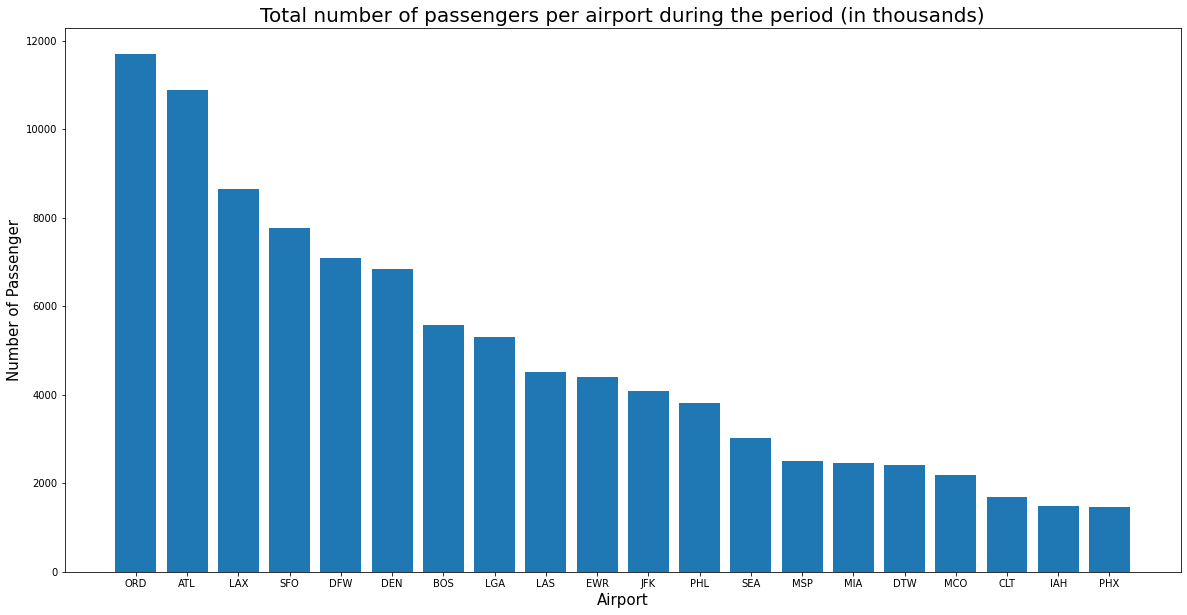

In [77]:
#Let's check if some airports are more important than others

import matplotlib.pyplot as plt

frequentation = data[["log_PAX", "Departure"]].groupby(["Departure"]).sum()
frequentation = frequentation.sort_values("log_PAX", ascending=False)

bars = frequentation.index
y_pos = np.arange(len(bars))
height = frequentation.iloc[:, 0]

plt.figure(figsize=(20, 10))
plt.title("Total number of passengers per airport during the period (in thousands)", fontsize=20)
plt.xlabel("Airport", fontsize=15)
plt.ylabel("Number of Passenger", fontsize=15)

plt.bar(y_pos, height)
plt.xticks(y_pos, bars);

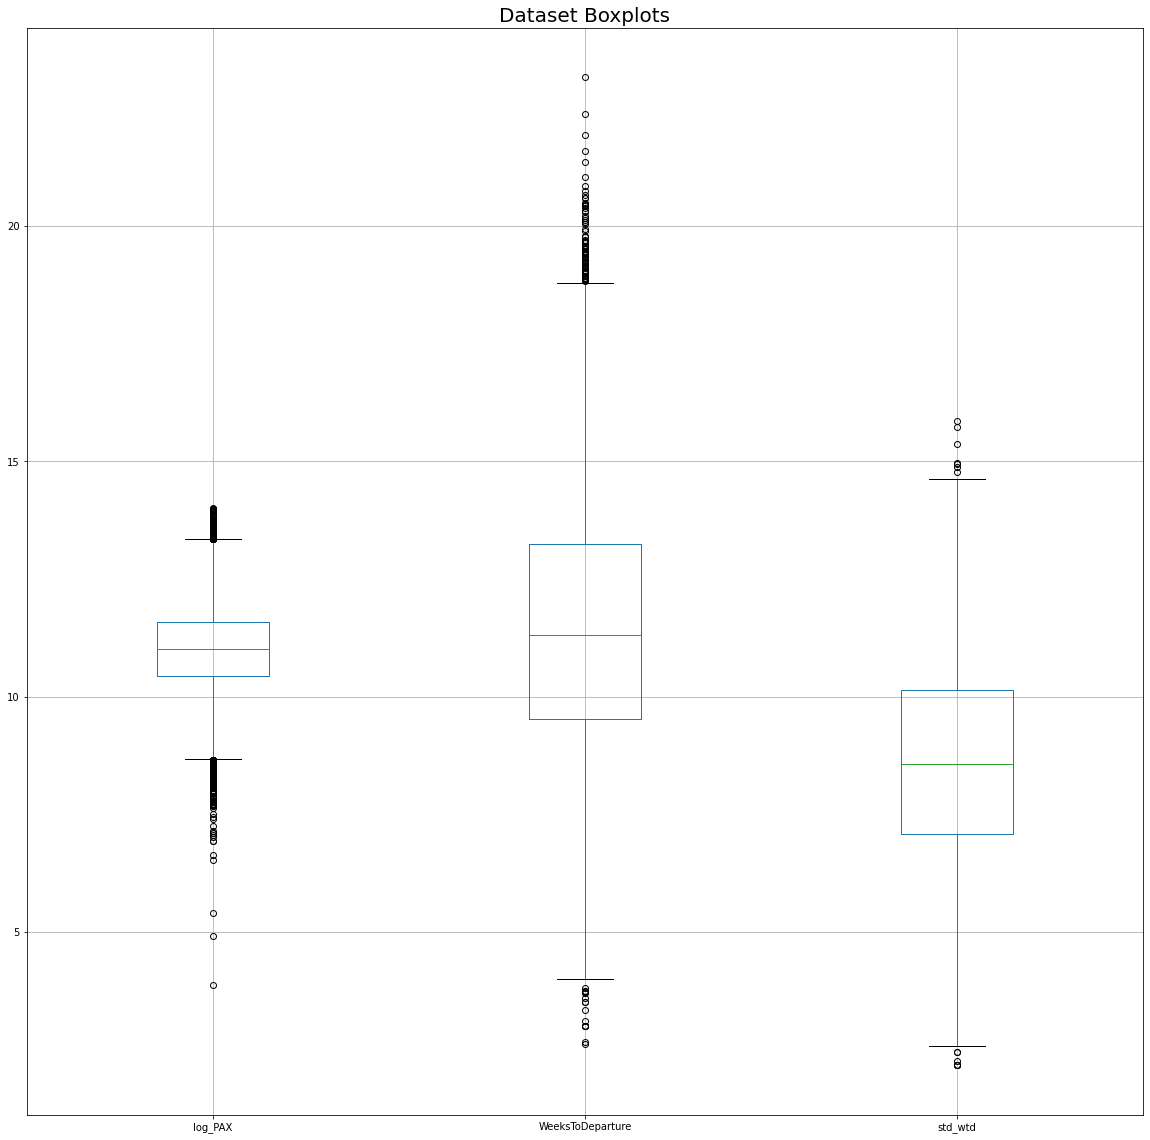

In [6]:
#Let's study our target variable, Log_PAX

plt.figure(figsize=(20, 20))
plt.title("Dataset Boxplots", fontsize=20)
data.boxplot(["log_PAX", "WeeksToDeparture", "std_wtd"]); 

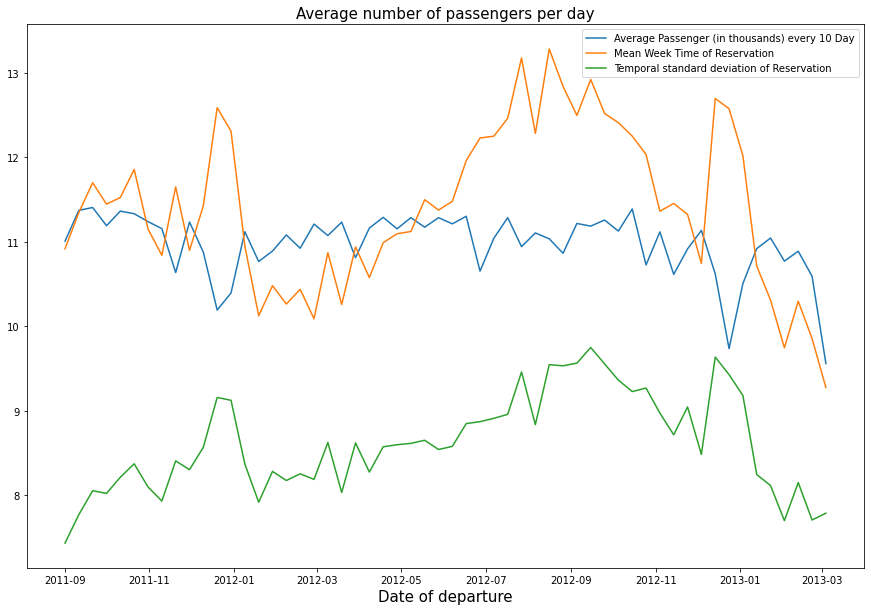

In [7]:
#Let's now check the evolution of each variable over time

import matplotlib.pyplot as plt 

avr_10D_passenger = data.groupby(pd.Grouper(key='Date', freq='10D')).mean()

plt.figure(figsize=(15, 10))
plt.plot(avr_10D_passenger["log_PAX"], label = "Average Passenger (in thousands) every 10 Day")
plt.plot(avr_10D_passenger["WeeksToDeparture"], label = "Mean Week Time of Reservation")
plt.plot(avr_10D_passenger["std_wtd"], label = "Temporal standard deviation of Reservation")
plt.title("Average number of passengers per day", fontsize=15)
plt.xlabel("Date of departure", fontsize=15)
plt.legend();

In [8]:
#We can see that correlation between variables is not that high. We will thus introduce new variables

data.corr()

,WeeksToDeparture,log_PAX,std_wtd
WeeksToDeparture,1.000000,0.163453,0.874999
log_PAX,0.163453,1.000000,0.109231
std_wtd,0.874999,0.109231,1.000000


In [9]:
#We introduce new variables that we sort by date

ext_data = pd.read_csv("external_data.csv")
ext_data["Date"] = pd.to_datetime(ext_data["Date"])
ext_data = ext_data.sort_values("Date")
ext_data = ext_data.set_index(ext_data["Date"])
ext_data = ext_data.drop(["Date"], axis=1)
ext_data

,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,,,
2011-09-01,ATL,35,29,24,21,18,14,79,56,32,1022,1019,1017,16,16,11,19,6,26.0,0.00,3,NaN,129
2011-09-01,LAX,21,18,15,14,14,13,90,76,61,1012,1011,1009,16,11,4,23,13,NaN,0.00,5,Fog,265
2011-09-01,DFW,38,33,27,17,14,11,51,35,19,1015,1013,1010,16,16,16,34,14,45.0,0.00,1,NaN,157
2011-09-01,BOS,22,19,17,16,14,12,90,72,53,1024,1023,1021,16,16,14,23,11,26.0,0.00,4,NaN,67
2011-09-01,DEN,36,28,20,5,3,-2,34,22,9,1016,1007,1004,16,16,16,29,15,39.0,0.00,5,NaN,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-05,ATL,18,12,4,13,7,-4,77,60,42,1018,1012,1006,16,15,10,60,26,79.0,3.30,7,Rain-Thunderstorm,235
2013-03-05,MSP,-1,-3,-6,-4,-5,-8,100,85,69,1027,1019,1015,16,6,1,27,15,40.0,10.41,8,Fog-Snow,44
2013-03-05,SFO,13,10,6,7,4,3,83,69,55,1019,1015,1011,16,15,6,53,22,69.0,3.56,6,Rain,188


In [10]:
#We now merge the two Datasets with respect to the first Dataset order

df_merged = pd.merge(data, ext_data, on="Date", how="inner")
df_merged

,Date,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2011-09-01,SFO,SEA,12.200000,11.641595,7.648529,ATL,35,29,24,21,18,14,79,56,32,1022,1019,1017,16,16,11,19,6,26.0,0.00,3,NaN,129
1,2011-09-01,SFO,SEA,12.200000,11.641595,7.648529,LAX,21,18,15,14,14,13,90,76,61,1012,1011,1009,16,11,4,23,13,NaN,0.00,5,Fog,265
2,2011-09-01,SFO,SEA,12.200000,11.641595,7.648529,DFW,38,33,27,17,14,11,51,35,19,1015,1013,1010,16,16,16,34,14,45.0,0.00,1,NaN,157
3,2011-09-01,SFO,SEA,12.200000,11.641595,7.648529,BOS,22,19,17,16,14,12,90,72,53,1024,1023,1021,16,16,14,23,11,26.0,0.00,4,NaN,67
4,2011-09-01,SFO,SEA,12.200000,11.641595,7.648529,DEN,36,28,20,5,3,-2,34,22,9,1016,1007,1004,16,16,16,29,15,39.0,0.00,5,NaN,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178035,2013-03-05,DFW,SFO,7.615385,9.381645,6.487661,ATL,18,12,4,13,7,-4,77,60,42,1018,1012,1006,16,15,10,60,26,79.0,3.30,7,Rain-Thunderstorm,235
178036,2013-03-05,DFW,SFO,7.615385,9.381645,6.487661,MSP,-1,-3,-6,-4,-5,-8,100,85,69,1027,1019,1015,16,6,1,27,15,40.0,10.41,8,Fog-Snow,44
178037,2013-03-05,DFW,SFO,7.615385,9.381645,6.487661,SFO,13,10,6,7,4,3,83,69,55,1019,1015,1011,16,15,6,53,22,69.0,3.56,6,Rain,188
178038,2013-03-05,DFW,SFO,7.615385,9.381645,6.487661,MIA,24,17,11,13,11,6,77,63,49,1023,1021,1020,16,16,16,21,7,45.0,0.00,1,NaN,145


In [11]:
#We merged the two DataFrames, but we are only interested in the information concerning the departure airports, 
#So we drop the other columns 

index = []

for i in range(len(df_merged)):
    if df_merged["Departure"][i] != df_merged["AirPort"][i]:
        index.append(i)
        
df_merged = df_merged.drop(index)
df_merged["Date"] = pd.to_datetime(df_merged["Date"])
df_merged = df_merged.sort_values("Date")
df_merged = df_merged.set_index(df_merged["Date"])
df_merged

,Date,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-09-01,2011-09-01,SFO,SEA,12.200000,11.641595,7.648529,SFO,22,17,12,13,11,9,83,69,55,1012,1010,1008,16,16,16,39,15,45.0,0.00,3,NaN,276
2011-09-01,2011-09-01,SFO,DFW,11.454545,11.321779,7.920602,SFO,22,17,12,13,11,9,83,69,55,1012,1010,1008,16,16,16,39,15,45.0,0.00,3,NaN,276
2011-09-01,2011-09-01,DTW,ORD,9.055556,11.251560,6.053412,DTW,33,28,22,22,20,19,84,64,44,1016,1015,1013,16,11,5,19,6,21.0,0.00,3,NaN,194
2011-09-01,2011-09-01,PHL,BOS,9.058824,11.376947,6.950455,PHL,28,23,17,17,15,12,93,68,42,1022,1021,1019,16,16,14,16,4,26.0,0.00,4,NaN,191
2011-09-01,2011-09-01,ORD,DEN,12.000000,11.426462,8.129632,ORD,34,28,22,23,22,19,84,70,56,1015,1013,1011,16,15,11,26,9,37.0,0.00,1,NaN,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-05,2013-03-05,SFO,BOS,12.045455,9.705346,8.823547,SFO,13,10,6,7,4,3,83,69,55,1019,1015,1011,16,15,6,53,22,69.0,3.56,6,Rain,188
2013-03-05,2013-03-05,LAX,BOS,11.100000,9.417859,8.589467,LAX,16,14,12,11,10,7,89,80,71,1021,1019,1017,16,12,5,29,12,32.0,0.00,7,Fog,250
2013-03-05,2013-03-05,LAX,JFK,14.750000,11.901932,12.152198,LAX,16,14,12,11,10,7,89,80,71,1021,1019,1017,16,12,5,29,12,32.0,0.00,7,Fog,250


In [12]:
#We know introduce new variables, like fuel price

import matplotlib.pyplot as plt 

Fuel = pd.read_csv("fuel_prices.csv", sep=";")
Fuel["Date"] = pd.to_datetime(Fuel["Date"])
Fuel = Fuel.sort_values("Date")
Fuel = Fuel.set_index(Fuel["Date"])
Fuel = Fuel.drop(["Date"], axis=1)

start = df_merged.index[0]
end = df_merged.index[len(df_merged) - 1]

Fuel = Fuel[start:end]
Fuel.columns = ["Fuel Price"]

df_merged = df_merged.join(Fuel)
df_merged = df_merged.drop(["AirPort"], axis=1)

In [13]:
#We will know deal with missing values 

df_merged.isna().sum()
df_merged["Events"] = df_merged["Events"].fillna(0)
df_merged["Events"] = df_merged["Events"].apply(lambda x: 1 if x!= 0 else 0)

df_merged["Fuel Price"] = df_merged["Fuel Price"].fillna(method="pad")

In [14]:
#We'll now focus on dates and make the difference between normal week days and week-ends

import warnings
from estimator import _encode_dates
warnings.filterwarnings("ignore")

df_merged = _encode_dates(df_merged)
df_merged["week-end"] = 0

for i in range(len(df_merged)):
    if df_merged["weekday"][i] in (5, 6):
        df_merged["week-end"][i] = 1
    else:
        df_merged["week-end"][i] = 0

In [15]:
#We now add the variables of special days (party or commemoration) in the USA

Specdays = pd.read_csv("usholidays.csv")
Specdays = Specdays.drop(["Unnamed: 0"], axis=1)
Specdays["Date"] = pd.to_datetime(Specdays["Date"])
Specdays = Specdays.sort_values("Date", ascending=False)
Specdays = Specdays.set_index(Specdays["Date"])
Specdays = Specdays.drop(["Date"], axis=1)
df_merged = df_merged.join(Specdays)
df_merged["Holiday"] = df_merged["Holiday"].fillna(0)
df_merged["Holiday"] = df_merged["Holiday"].apply(lambda x: 1 if x!= 0 else 0)
df_merged

,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,Fuel Price,year,month,day,weekday,week,n_days,week-end,Holiday
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-09-01,SFO,SEA,12.200000,11.641595,7.648529,22,17,12,13,11,9,83,69,55,1012,1010,1008,16,16,16,39,15,45.0,0.00,3,0,276,3.088,2011,9,1,3,35,15218,0,0
2011-09-01,SFO,DFW,11.454545,11.321779,7.920602,22,17,12,13,11,9,83,69,55,1012,1010,1008,16,16,16,39,15,45.0,0.00,3,0,276,3.088,2011,9,1,3,35,15218,0,0
2011-09-01,DTW,ORD,9.055556,11.251560,6.053412,33,28,22,22,20,19,84,64,44,1016,1015,1013,16,11,5,19,6,21.0,0.00,3,0,194,3.088,2011,9,1,3,35,15218,0,0
2011-09-01,PHL,BOS,9.058824,11.376947,6.950455,28,23,17,17,15,12,93,68,42,1022,1021,1019,16,16,14,16,4,26.0,0.00,4,0,191,3.088,2011,9,1,3,35,15218,0,0
2011-09-01,ORD,DEN,12.000000,11.426462,8.129632,34,28,22,23,22,19,84,70,56,1015,1013,1011,16,15,11,26,9,37.0,0.00,1,0,197,3.088,2011,9,1,3,35,15218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-05,SFO,BOS,12.045455,9.705346,8.823547,13,10,6,7,4,3,83,69,55,1019,1015,1011,16,15,6,53,22,69.0,3.56,6,1,188,3.021,2013,3,5,1,10,15769,0,0
2013-03-05,LAX,BOS,11.100000,9.417859,8.589467,16,14,12,11,10,7,89,80,71,1021,1019,1017,16,12,5,29,12,32.0,0.00,7,1,250,3.021,2013,3,5,1,10,15769,0,0
2013-03-05,LAX,JFK,14.750000,11.901932,12.152198,16,14,12,11,10,7,89,80,71,1021,1019,1017,16,12,5,29,12,32.0,0.00,7,1,250,3.021,2013,3,5,1,10,15769,0,0


In [16]:
#Let's now regroup all special days (week ends and days off) in the same column

df_merged["Day_off"] = 0 

for i in range(len(df_merged["Day_off"])):
    if ((df_merged["week-end"][i]==1) or (df_merged["Holiday"][i]==1)):
        df_merged["Day_off"][i] = 1
    else:
        df_merged["Day_off"][i] = 0
        
df_merged = df_merged.drop(["week-end", "Holiday"], axis=1)

In [45]:
#Let's now add a vacation variable https://www.feiertagskalender.ch/ferien.php?geo=3537&jahr=2011&hl=en

import datetime

df_merged["Holiday"] = 0

for i in range(len(df_merged)):
    if ((datetime.datetime(2011, 5, 30) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2011, 8, 28)) or 
        (datetime.datetime(2011, 11, 21) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2011, 11, 27)) or
        (datetime.datetime(2011, 12, 25) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2012, 1, 1))
       or (datetime.datetime(2012, 2, 20) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2012, 2, 26))
       or (datetime.datetime(2012, 4, 9) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2012, 4, 15))
       or (datetime.datetime(2012, 6, 3) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2012, 8, 26))
       or (datetime.datetime(2012, 11, 19) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2012, 11, 25))
       or (datetime.datetime(2012, 12, 25) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2013, 1, 1)
       or (datetime.datetime(2013, 2, 18) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2013, 2, 24)
       or (datetime.datetime(2013, 4, 8) <= df_merged.iloc[:, 0].index[i] <= datetime.datetime(2013, 4, 14))))):
           df_merged["Holiday"][i] = 1
    else:
           df_merged["Holiday"][i] = 0
        
        
df_merged["Holiday"].sum()     

2130

In [46]:
df_merged.corr()

,WeeksToDeparture,log_PAX,std_wtd,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,CloudCover,Events,WindDirDegrees,Fuel Price,year,month,day,weekday,week,n_days,Day_off,Holiday
WeeksToDeparture,1.000000,0.163453,0.874999,0.206334,0.231495,0.249800,0.191272,0.194256,0.195314,-0.016973,0.000090,0.014556,-0.094298,-0.035540,0.021081,-0.008579,0.069832,0.060133,-0.042079,-0.059728,-0.049292,-0.092071,-0.006602,0.026927,-0.082857,-0.065728,0.161949,0.032103,0.094739,0.165965,0.032930,0.082802,0.107177
log_PAX,0.163453,1.000000,0.109231,0.090565,0.109815,0.125692,0.147102,0.141931,0.135353,0.071486,0.069350,0.059809,-0.079455,-0.052883,-0.030519,-0.007268,0.000987,-0.014704,0.017331,0.030203,0.019423,-0.004494,0.027967,0.026412,0.007765,-0.083499,0.005880,0.010484,-0.265077,0.017219,-0.104660,-0.403605,-0.090304
std_wtd,0.874999,0.109231,1.000000,0.126661,0.145906,0.161217,0.125438,0.126978,0.128946,-0.002598,0.010361,0.019356,-0.050787,-0.006724,0.034379,-0.014228,0.044173,0.036200,-0.032839,-0.038270,-0.035947,-0.058702,0.000190,0.024363,-0.010857,0.041543,0.082489,0.010229,0.064335,0.083992,0.114758,0.056540,0.051080
Max TemperatureC,0.206334,0.090565,0.126661,1.000000,0.976539,0.902143,0.729500,0.700047,0.650915,-0.149327,-0.241066,-0.290901,-0.381453,-0.269496,-0.135710,0.084386,0.247664,0.191000,-0.068258,-0.192162,-0.041876,-0.263349,-0.146589,-0.078041,-0.154052,-0.157802,0.155665,0.014370,-0.004889,0.157648,-0.094055,-0.030574,0.258893
Mean TemperatureC,0.231495,0.109815,0.145906,0.976539,1.000000,0.972056,0.800701,0.784701,0.745692,-0.078050,-0.126289,-0.153970,-0.409280,-0.279165,-0.134644,0.062362,0.193932,0.129214,-0.076790,-0.180934,-0.048209,-0.162450,-0.073389,-0.096496,-0.167399,-0.168318,0.175338,0.018225,-0.005200,0.177511,-0.093389,-0.032089,0.270729
Min TemperatureC,0.249800,0.125692,0.161217,0.902143,0.972056,1.000000,0.837455,0.836921,0.811209,0.003220,0.005134,0.002892,-0.419570,-0.276112,-0.126840,0.037259,0.126328,0.056868,-0.083571,-0.161907,-0.054195,-0.043955,0.008733,-0.112281,-0.175581,-0.171106,0.187327,0.021586,-0.004479,0.189468,-0.088144,-0.033009,0.270130
Dew PointC,0.191272,0.147102,0.125438,0.729500,0.800701,0.837455,1.000000,0.974178,0.917653,0.467101,0.419184,0.314058,-0.339733,-0.231171,-0.115123,0.007705,-0.069798,-0.191178,-0.054281,-0.149581,-0.019714,0.158437,0.210137,-0.135293,-0.137188,-0.164638,0.192123,0.033766,-0.017322,0.195167,-0.075316,-0.041821,0.220493
MeanDew PointC,0.194256,0.141931,0.126978,0.700047,0.784701,0.836921,0.974178,1.000000,0.973689,0.493116,0.479339,0.395633,-0.327770,-0.198235,-0.068966,-0.010610,-0.091557,-0.201070,-0.109006,-0.192054,-0.078688,0.180250,0.206803,-0.153401,-0.146079,-0.171089,0.208113,0.028458,-0.012648,0.210022,-0.072467,-0.038776,0.223109
Min DewpointC,0.195314,0.135353,0.128946,0.650915,0.745692,0.811209,0.917653,0.973689,1.000000,0.476902,0.498667,0.444067,-0.295724,-0.145552,-0.012846,-0.025385,-0.075015,-0.170810,-0.156470,-0.222758,-0.128643,0.170059,0.174849,-0.162128,-0.154897,-0.170689,0.217841,0.026898,-0.010261,0.219035,-0.064967,-0.034219,0.217973
Max Humidity,-0.016973,0.071486,-0.002598,-0.149327,-0.078050,0.003220,0.467101,0.493116,0.476902,1.000000,0.912801,0.705663,0.011475,0.029171,0.035215,-0.095497,-0.433447,-0.534772,-0.075373,-0.105615,-0.060507,0.419463,0.427027,-0.090822,0.017046,-0.028220,0.070626,0.021924,-0.009216,0.072428,0.015563,-0.018056,-0.022472


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_PCA = df_merged.iloc[:, 2:].values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(1, 33):
    df_PCA[:,i] = le.fit_transform(df_PCA[:,i])
    
defra_scaled = pd.DataFrame(StandardScaler().fit_transform(df_PCA))

defra_scaled.columns = df_merged.iloc[:, 2:].columns
defra_scaled

,WeeksToDeparture,log_PAX,std_wtd,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,Fuel Price,year,month,day,weekday,week,n_days,Day_off
0,0.270375,0.484005,-0.632852,0.285276,0.286679,0.303134,0.479708,0.559248,0.645658,0.178943,0.408125,0.595299,-1.201791,-0.958365,-0.732762,0.102156,0.520362,0.749056,0.684304,0.157377,0.201285,-0.546007,-0.554548,-0.786664,0.810201,0.314439,-1.545109,0.563086,-1.634824,0.017904,0.426838,-1.706381,-0.678455
1,0.002898,0.100780,-0.471934,0.285276,0.286679,0.303134,0.479708,0.559248,0.645658,0.178943,0.408125,0.595299,-1.201791,-0.958365,-0.732762,0.102156,0.520362,0.749056,0.684304,0.157377,0.201285,-0.546007,-0.554548,-0.786664,0.810201,0.314439,-1.545109,0.563086,-1.634824,0.017904,0.426838,-1.706381,-0.678455
2,-0.857886,0.025081,-1.283899,1.410817,1.487990,1.414586,1.505416,1.522316,1.630552,0.238952,0.108495,0.021115,-0.564482,-0.200506,-0.028573,0.102156,-1.446962,-0.966557,-1.128253,-1.263648,-1.136907,-0.546007,-0.554548,-0.786664,-0.064330,0.314439,-1.545109,0.563086,-1.634824,0.017904,0.426838,-1.706381,-0.678455
3,-0.856713,0.162285,-0.973773,0.899208,0.941940,0.858860,0.935578,0.987278,0.941126,0.779036,0.348199,-0.083282,0.391481,0.708923,0.816455,0.102156,0.520362,0.503969,-1.293031,-1.579431,-0.945737,-0.546007,-0.141652,-0.786664,-0.096325,0.314439,-1.545109,0.563086,-1.634824,0.017904,0.426838,-1.706381,-0.678455
4,0.198613,0.219059,-0.338775,1.513139,1.487990,1.414586,1.619383,1.736332,1.630552,0.238952,0.468051,0.647498,-0.723810,-0.503650,-0.310248,0.102156,0.126897,0.013793,-0.469141,-0.789973,-0.117332,-0.546007,-1.380340,-0.786664,-0.032335,0.314439,-1.545109,0.563086,-1.634824,0.017904,0.426838,-1.706381,-0.678455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8897,0.214923,-1.086746,0.112751,-0.635621,-0.477791,-0.363738,-0.204097,-0.189806,0.054721,0.178943,0.408125,0.595299,-0.086501,-0.200506,-0.310248,0.102156,0.126897,-0.721470,2.167305,1.262619,1.093413,0.923712,0.684141,1.271191,-0.128321,-0.179653,1.950333,-1.015932,-1.184103,-0.981345,-1.087595,1.744158,-0.678455
8898,-0.124317,-1.209757,-0.039927,-0.328655,-0.040951,0.303134,0.251773,0.452240,0.448679,0.538999,1.067310,1.430476,0.232154,0.405780,0.534779,0.102156,-1.053497,-0.966557,-0.139586,-0.316298,-0.372226,-0.546007,1.097037,1.271191,0.532911,-0.179653,1.950333,-1.015932,-1.184103,-0.981345,-1.087595,1.744158,-0.678455
8899,1.185343,0.848306,1.606125,-0.328655,-0.040951,0.303134,0.251773,0.452240,0.448679,0.538999,1.067310,1.430476,0.232154,0.405780,0.534779,0.102156,-1.053497,-0.966557,-0.139586,-0.316298,-0.372226,-0.546007,1.097037,1.271191,0.532911,-0.179653,1.950333,-1.015932,-1.184103,-0.981345,-1.087595,1.744158,-0.678455
8900,1.035838,-1.181370,1.409640,-0.635621,-0.477791,-0.363738,-0.204097,-0.189806,0.054721,0.178943,0.408125,0.595299,-0.086501,-0.200506,-0.310248,0.102156,0.126897,-0.721470,2.167305,1.262619,1.093413,0.923712,0.684141,1.271191,-0.128321,-0.179653,1.950333,-1.015932,-1.184103,-0.981345,-1.087595,1.744158,-0.678455


The variance explained by the 15 main axes is : 0.918786


The 15 most important axes are :Index(['WeeksToDeparture', 'log_PAX', 'std_wtd', 'Max TemperatureC',
       'Mean TemperatureC', 'Min TemperatureC', 'Dew PointC', 'MeanDew PointC',
       'Min DewpointC', 'Max Humidity', 'Mean Humidity', 'Min Humidity',
       'Max Sea Level PressurehPa', 'Mean Sea Level PressurehPa',
       'Min Sea Level PressurehPa'],
      dtype='object')


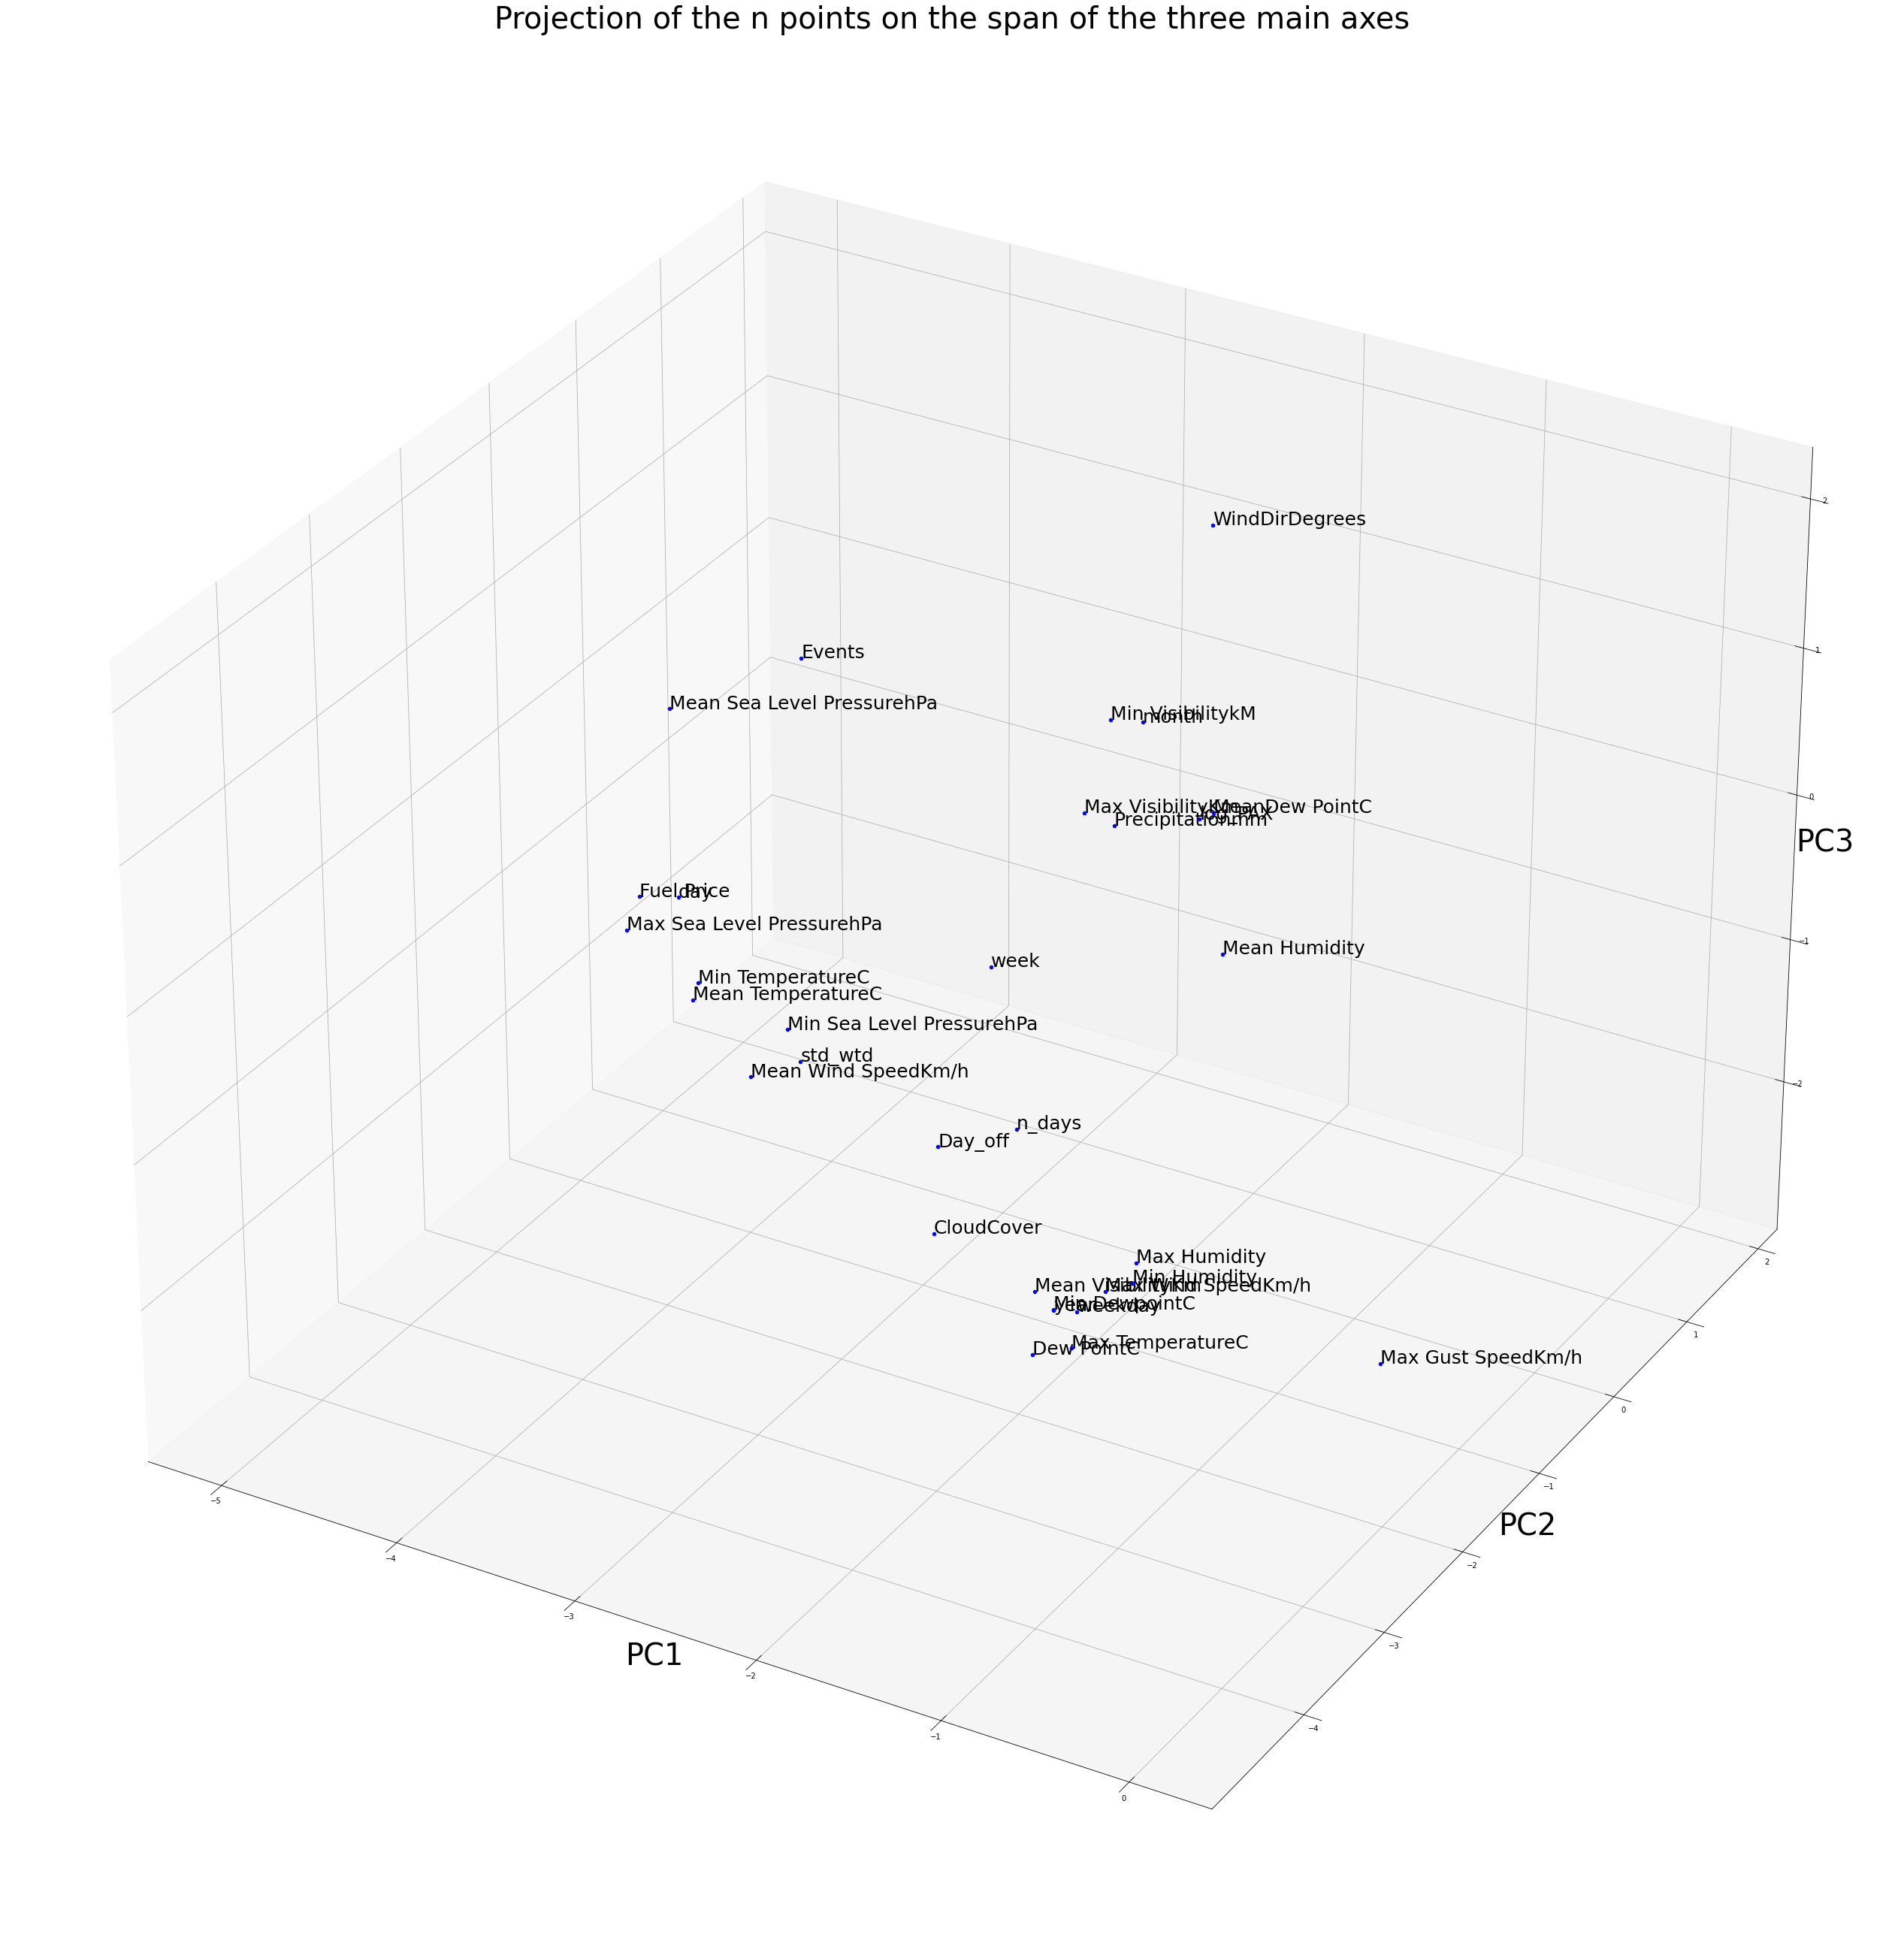

In [17]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

n_components = 15

pca = PCA(n_components = n_components)
pca.fit(defra_scaled)
Projection = pca.transform(defra_scaled)
Projection_List = Projection[:, 0], Projection[:, 1], Projection[:, 2]

print("The variance explained by the {} main axes is : {:.6f}".format(n_components, sum(pca.explained_variance_ratio_)))

print("\n")

defra_pca = pca.fit_transform(defra_scaled)
Label = defra_scaled.columns

import matplotlib.pyplot as plt

fig = figure(figsize = (35, 35))
ax = Axes3D(fig)

for i in range(1, 33):
    ax.scatter(Projection_List[0][i], Projection_List[1][i], Projection_List[2][i], color='b') 
    ax.text(Projection_List[0][i], Projection_List[1][i], Projection_List[2][i],  '%s' % (Label[i]), size=25, zorder=1,  
    color='k')
    ax.set_xlabel("PC1", fontsize = 40)
    ax.set_ylabel("PC2", fontsize = 40)
    ax.set_zlabel("PC3", fontsize = 40)

    
plt.title("Projection of the n points on the span of the three main axes", fontsize = 40);
        
from numpy.linalg import *

D, V = eig(defra_scaled.T @ defra_scaled/len(defra_scaled))
index = np.argsort(D)[::-1][:n_components]
importance = defra_scaled.columns[index]
print("The {} most important axes are :{}".format(n_components, importance))